<a href="https://colab.research.google.com/github/huseyiinozel/CPE312-Machine-Learning-Class/blob/main/WEEK6HOMEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("/content/weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
x=np.array(data.iloc[:,0]).reshape(-1,1)
y=np.array(data.iloc[:,3]).reshape(-1,1)

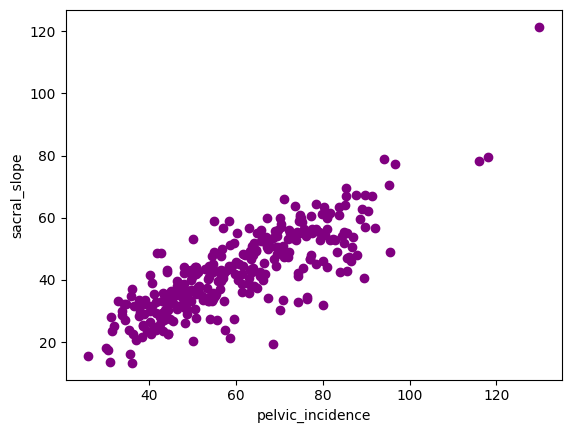

In [6]:
plt.scatter(x,y,color="purple")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()

In [8]:
lnr.fit(x,y)

LinearRegression()

In [9]:
y_head = lnr.predict(x)

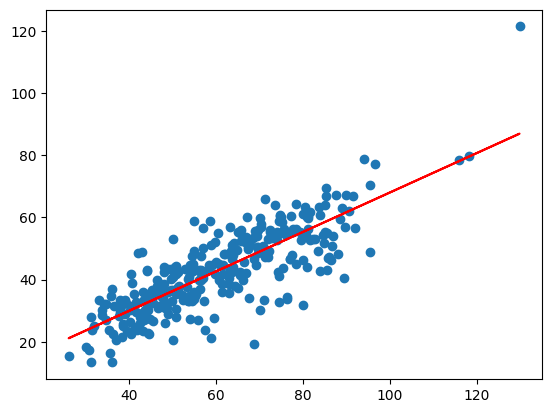

In [10]:
plt.plot(x,y_head,color="red")
plt.scatter(x,y)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [14]:
print("intercept:",mlr.intercept_)
print("coef:",list(zip(x,mlr.coef_)))

intercept: [3.68786324]
coef: [(array([63.0278175]), array([0.65370566]))]


In [16]:
X_new = np.linspace(0,132,200).reshape(200,1)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures(degree=12,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.5624114598886003


In [20]:
poly = PolynomialFeatures(degree=12,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.5624114598886003


In [22]:
X_new = np.linspace(0,132,200).reshape(200,1)

In [23]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

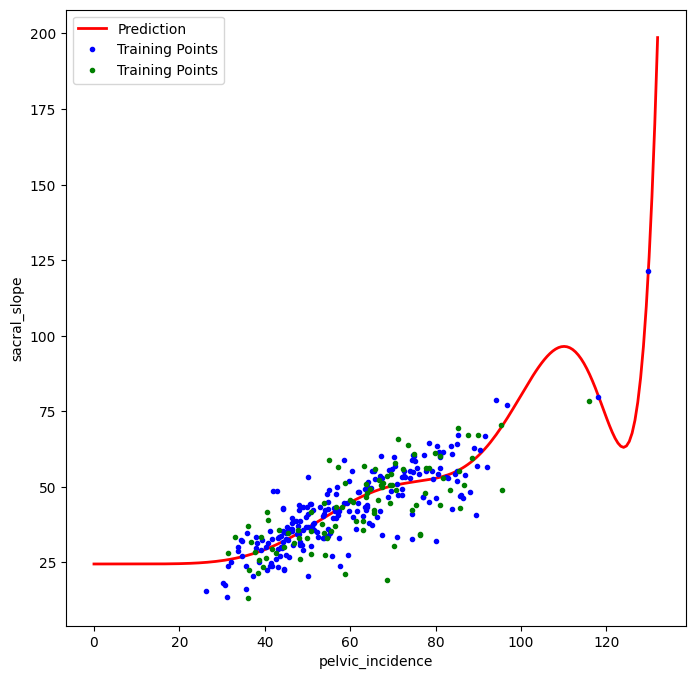

In [24]:
plt.figure(figsize=[8,8])
plt.plot(X_new,y_new,"r-",linewidth=2,label="Prediction")
plt.plot(x_train,y_train,"b.",label="Training Points")
plt.plot(x_test,y_test,"g.",label="Training Points")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()

In [25]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [29]:

data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [31]:

d_new = data[data['class'] == 'Abnormal']


x = np.array(d_new.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(d_new.loc[:, 'sacral_slope']).reshape(-1,1)

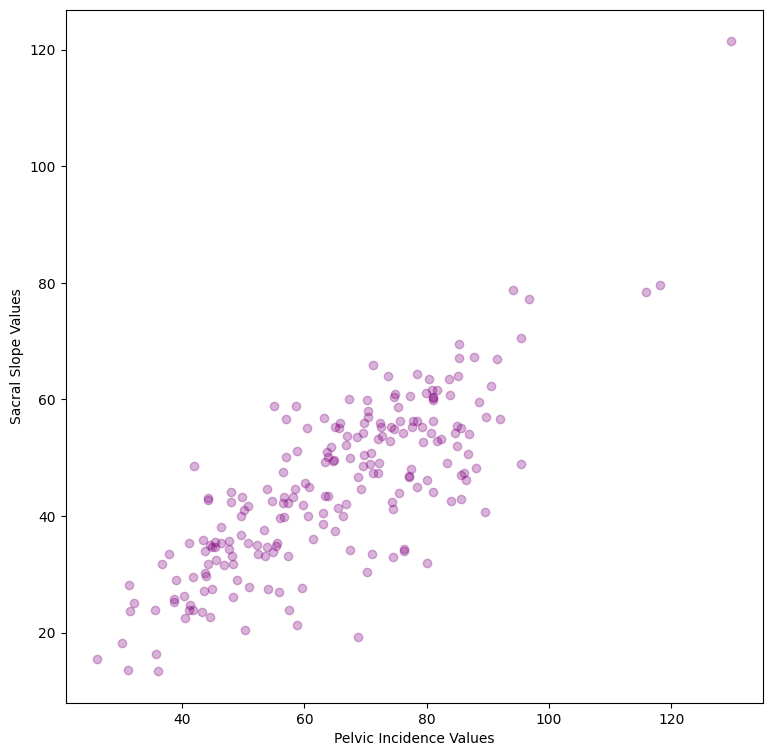

In [33]:

plt.figure(figsize=(9,9))
plt.scatter(x=x, y=y, color='purple', alpha=0.3)
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(x_poly, y)
y_head2 = lr2.predict(x_poly)

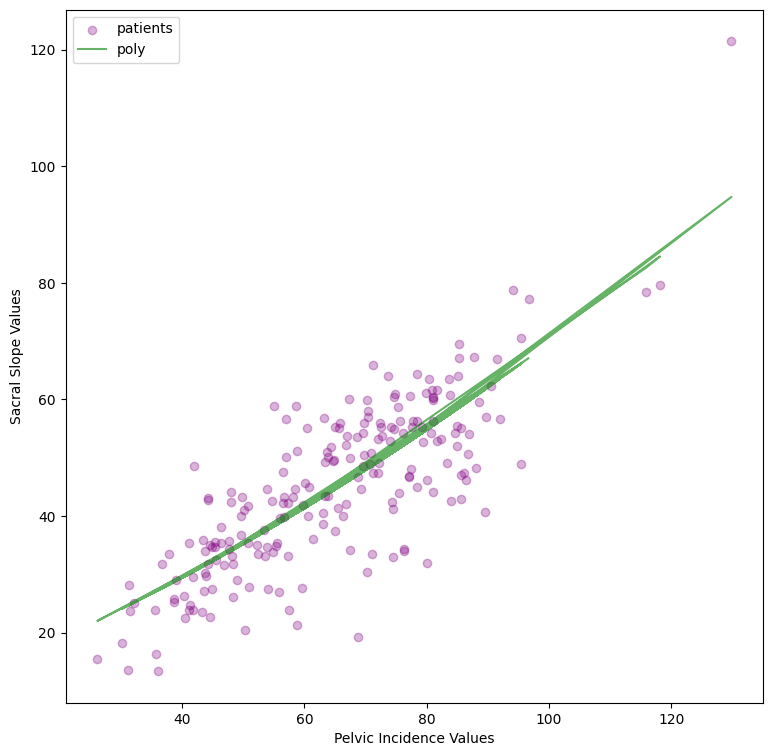

In [36]:
plt.figure(figsize=(9,9))
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')

plt.plot(x, y_head2, color='green', alpha=0.6, label='poly')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()

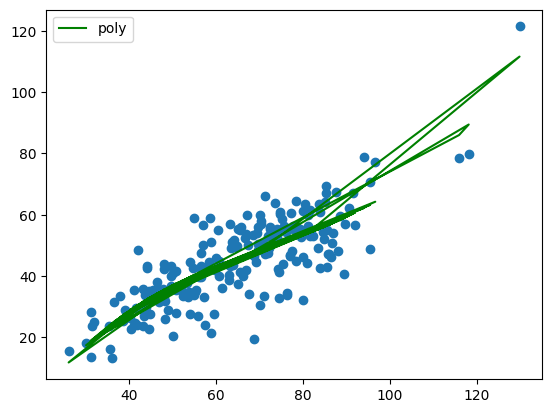

In [37]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 3) 

x_poly = polynomial_regression.fit_transform(x) 

linear_regression2 = LinearRegression()
linear_regression2.fit(x_poly,y)


prediction_poly = linear_regression2.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,prediction_poly,color="green",label = "poly")
plt.legend()
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

x=data.iloc[:,[1,2,3,4,5]].values
y=data.pelvic_incidence.values.reshape(-1,1)

multiple_reg=LinearRegression()
multiple_reg.fit(x,y)
print("b0: ",multiple_reg.intercept_) 
print("b1,b2,b3,b4,b5 : ", multiple_reg.coef_)

b0:  [-4.42291537e-10]
b1,b2,b3,b4,b5 :  [[ 1.00000000e+00  1.88670329e-11  1.00000000e+00  6.21941528e-12
  -5.31224717e-12]]
